<h2>EDA: Wildfire Incidents</h2>

This notebook will begin to explore the dataset of wildfire incidents in the Bay Area from 2015-2020. This dataset will later be combined with other data along the axes of time and location, so one of our main goals is to explore trends in how the wildfires data has evolved over time, and whether there are notable features when it is broken down by county. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy
import requests

In [2]:
fires_df = pd.read_csv('bay_area_fires.csv')
fires_df.head(2)

,UniqueId,index,AcresBurned,Active,ArchiveYear,Counties,Extinguished,Fatalities,Injuries,Latitude,Longitude,Name,Started,StructuresDamaged,StructuresDestroyed,InBay,Started_datetime,Extinguished_datetime,Burn_time,Burn_time_hrs
0,94a7ae52-fed9-4997-b972-1761aa4b89ca,10,25118.0,False,2015,"('Lake', 'Napa')",2015-08-25T06:45:00Z,0.0,0.0,38.81425,-122.486732,Jerusalem Fire,2015-08-09T15:34:00Z,0.0,27.0,True,2015-08-09 15:34:00.000,2015-08-25 06:45:00.000,15 days 15:11:00.000000000,375.183333
1,8fc920eb-ca45-4d77-9a92-1326eca602d6,21,2700.0,False,2015,"('Alameda',)",2015-08-22T18:30:00Z,0.0,0.0,37.38450,-121.373200,Tesla Fire,2015-08-19T14:45:00Z,0.0,0.0,True,2015-08-19 14:45:00.000,2015-08-22 18:30:00.000,3 days 03:45:00.000000000,75.750000


In [3]:
# We'll first do a bit more data cleaning

# Dropping unused 'index' and 'InBay' columns, which are both remnants of our prior data cleaning

drop_cols = ['index', 'InBay']
fires_df.drop(drop_cols, axis=1, inplace=True)
fires_df.head(2)

,UniqueId,AcresBurned,Active,ArchiveYear,Counties,Extinguished,Fatalities,Injuries,Latitude,Longitude,Name,Started,StructuresDamaged,StructuresDestroyed,Started_datetime,Extinguished_datetime,Burn_time,Burn_time_hrs
0,94a7ae52-fed9-4997-b972-1761aa4b89ca,25118.0,False,2015,"('Lake', 'Napa')",2015-08-25T06:45:00Z,0.0,0.0,38.81425,-122.486732,Jerusalem Fire,2015-08-09T15:34:00Z,0.0,27.0,2015-08-09 15:34:00.000,2015-08-25 06:45:00.000,15 days 15:11:00.000000000,375.183333
1,8fc920eb-ca45-4d77-9a92-1326eca602d6,2700.0,False,2015,"('Alameda',)",2015-08-22T18:30:00Z,0.0,0.0,37.38450,-121.373200,Tesla Fire,2015-08-19T14:45:00Z,0.0,0.0,2015-08-19 14:45:00.000,2015-08-22 18:30:00.000,3 days 03:45:00.000000000,75.750000


In [4]:
# TODO: Getting zip code for each fire based on lat/long, as we may need to combine with other datasets based on zip code

In [5]:
# Replacing negative 'burn time' values with 0
# We assume that these were very brief fires

def clean_burn_time(time):
    if time < 0:
        return 0.0
    else:
        return time

In [6]:
fires_df['Clean_burn_time_hrs'] = fires_df['Burn_time_hrs'].apply(clean_burn_time)

In [7]:
fires_df.sort_values(by='Clean_burn_time_hrs').head(10)

,UniqueId,AcresBurned,Active,ArchiveYear,Counties,Extinguished,Fatalities,Injuries,Latitude,Longitude,Name,Started,StructuresDamaged,StructuresDestroyed,Started_datetime,Extinguished_datetime,Burn_time,Burn_time_hrs,Clean_burn_time_hrs
135,40ce99a7-fbca-4b41-b3bf-e2f863fdcc7e,19.0,False,2019,"('Alameda',)",2019-08-31T12:50:00Z,0.0,0.0,37.718636,-121.657011,Carroll Fire,2019-08-31T12:55:15Z,0.0,0.0,2019-08-31 12:55:15.000,2019-08-31 12:50:00.000,-1 days +23:54:45.000000000,-0.087500,0.000000
158,cac8f4bf-d269-4f13-b59c-07670b34f81f,75.0,False,2020,"('Contra Costa',)",2020-07-20T11:20:00Z,0.0,0.0,37.977309,-121.620238,Holland Fire,2020-07-20T18:04:37Z,0.0,0.0,2020-07-20 18:04:37.000,2020-07-20 11:20:00.000,-1 days +17:15:23.000000000,-6.743611,0.000000
4,7c162fbf-922c-4128-9e30-a1e8848e15ab,242.0,False,2015,"('Alameda',)",2015-05-28T10:30:00Z,0.0,0.0,0.000000,0.000000,Christensen Fire,2015-05-28T17:00:00Z,0.0,0.0,2015-05-28 17:00:00.000,2015-05-28 10:30:00.000,-1 days +17:30:00.000000000,-6.500000,0.000000
131,65e8fbe1-5300-4c90-9f48-0e7bfe55b1bc,25.0,False,2019,"('Alameda',)",2019-07-05T03:20:00Z,0.0,0.0,37.469000,-121.369700,Bikeway Fire,2019-07-05T09:46:01.973Z,0.0,0.0,2019-07-05 09:46:01.973,2019-07-05 03:20:00.000,-1 days +17:33:58.027000000,-6.433881,0.000000
130,25e80e7d-5790-4192-9cf0-a190f36158f0,29.0,False,2019,"('Santa Clara',)",2019-10-07T09:58:00Z,0.0,0.0,37.066483,-121.219163,Point Fire,2019-10-07T09:58:51.763Z,0.0,0.0,2019-10-07 09:58:51.763,2019-10-07 09:58:00.000,-1 days +23:59:08.237000000,-0.014379,0.000000
157,5698ae57-d61f-421b-8b75-623e9aa6debb,79.0,False,2020,"('Solano',)",2020-06-05T15:10:00Z,0.0,0.0,38.196893,-122.156313,McGary Fire,2020-06-05T17:09:00Z,0.0,0.0,2020-06-05 17:09:00.000,2020-06-05 15:10:00.000,-1 days +22:01:00.000000000,-1.983333,0.000000
137,a87ab8be-3da9-4cb0-a72c-5125acc001ef,12.0,False,2019,"('Alameda',)",2019-10-08T17:51:00Z,0.0,0.0,37.606000,-121.853000,Little Fire,2019-10-08T17:25:12Z,0.0,0.0,2019-10-08 17:25:12.000,2019-10-08 17:51:00.000,0 days 00:25:48.000000000,0.430000,0.430000
113,d35fa87b-0f19-4dd8-8739-4bdbc92d1361,139.0,False,2019,"('Alameda',)",2019-08-21T18:27:00Z,0.0,0.0,37.717340,-121.558670,Patterson Fire,2019-08-21T17:56:05Z,0.0,0.0,2019-08-21 17:56:05.000,2019-08-21 18:27:00.000,0 days 00:30:55.000000000,0.515278,0.515278
101,3fc9ae75-8844-43a5-8330-6956cdb6e3a7,22.0,False,2019,"('Alameda',)",2019-07-12T19:20:00Z,0.0,0.0,37.093243,-121.586846,Mid Fire,2019-07-12T18:40:09Z,0.0,0.0,2019-07-12 18:40:09.000,2019-07-12 19:20:00.000,0 days 00:39:51.000000000,0.664167,0.664167
132,bc3e7037-5022-4e6a-8a1f-925c7e9aafc8,24.0,False,2019,"('Contra Costa',)",2019-07-05T14:58:00Z,0.0,0.0,37.998370,-122.162010,Fellow Fire,2019-07-05T13:33:56Z,0.0,0.0,2019-07-05 13:33:56.000,2019-07-05 14:58:00.000,0 days 01:24:04.000000000,1.401111,1.401111


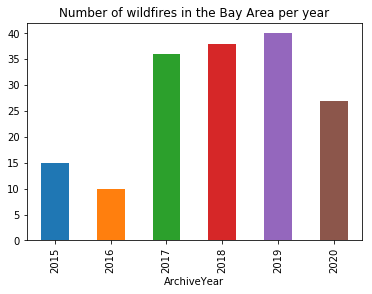

In [8]:
# Number of fires per year across the entire Bay Area

fires_df.groupby('ArchiveYear')['UniqueId'].count().plot.bar()
_ = plt.title('Number of wildfires in the Bay Area per year')

We see that the number of fires reached a peak in 2019, and was generally the highest in 2017-2019. Next we want to look at the number of acres burned to investigate the severity and extent of the fires.

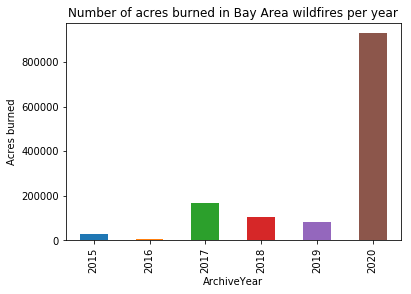

In [9]:
# creating graph of acres burned per year
fires_df.groupby('ArchiveYear')['AcresBurned'].sum().plot.bar()
plt.ylabel('Acres burned')
_ = plt.title('Number of acres burned in Bay Area wildfires per year')

This graph complicates the previous count of fires per year by revealing that, in 2020, by far the most acres were burned, even though there has been a smaller number of fires this year than in previous years. However, because there is such a large discrepancy in acres burned in 2020 vs. previous years, we will examine the 2020 data to see if it is really accurate.

In [53]:
fires_df[fires_df['ArchiveYear']==2020].sort_values(by='AcresBurned', ascending=False)[['AcresBurned','Name']]

,AcresBurned,Name
147,396624.0,SCU Lightning Complex
148,363220.0,"LNU Lightning Complex (includes Hennessey, Gam..."
139,86509.0,CZU Lightning Complex (Including Warnella Fire)
149,67484.0,Glass Fire
150,5513.0,Crews Fire
151,4929.0,Woodward Fire
152,1837.0,Quail Fire
140,343.0,Park Fire
153,300.0,Wildlife Fire
154,298.0,California Fire


According to Wikipedia, these data do indeed seem to be accurate; the SCU Lightning Complex Fire, for example, is "the third-largest wildfire recorded in California's modern history," and burned nearly 400,000 acres.

Now that we've confirmed the accuracy of the high values in 2020, we will examine the length of time that the wildfires burned, which we will graph next.

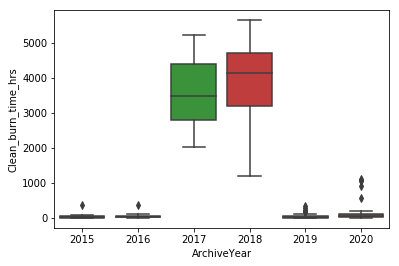

In [10]:
sns.boxplot(x='ArchiveYear',y='Clean_burn_time_hrs',data=fires_df)

These boxplots reveal something extremely odd about the data: in 2017 and 2018, there were no short-burning fires, and the average burn time of fires was MUCH higher than in other years. This makes us wonder if something may be wrong with those two years' data. 

In [11]:
# New columns in df for the months in which the fire started and was extinguished
fires_df['Started_datetime'] = pd.to_datetime(fires_df['Started_datetime'])
fires_df['Extinguished_datetime'] = pd.to_datetime(fires_df['Extinguished_datetime'])
fires_df['Started_month'] = fires_df['Started_datetime'].dt.month
fires_df['Extinguished_month'] = fires_df['Extinguished_datetime'].dt.month

fires_df[fires_df['ArchiveYear']==2018][['Name','Started_datetime','Extinguished_datetime']].head(10)

,Name,Started_datetime,Extinguished_datetime
61,County Fire,2018-06-30 14:12:00,2019-01-04 09:57:00
62,Branscombe Fire,2018-10-07 13:00:00,2019-01-04 08:57:00
63,Snell Fire,2018-09-08 14:29:00,2019-01-04 09:06:00
64,Nelson Fire,2018-08-10 16:57:00,2019-01-04 09:20:00
65,Nurse Fire,2018-11-08 13:28:00,2019-01-04 08:47:00
66,Grant Fire,2018-07-08 17:38:00,2019-01-04 09:53:00
67,Grant Fire,2018-05-30 13:21:00,2019-01-04 10:20:00
68,Country Fire,2018-07-22 13:06:00,2019-01-04 09:37:00
69,Valley Fire,2018-06-29 16:06:00,2019-01-04 09:58:00
70,Marsh Fire,2018-07-25 14:41:00,2019-01-04 09:34:00


Here, we notice that the extinguished date for fires in 2018 is ALWAYS January 4, 2019, which seems very suspicious. Indeed, a quick Google search reveals the inaccuracy of these data: the Branscombe Fire, for example, was extinguished on Nov. 9, 2018, while the Snell Fire was extinguished on September 15, 2018.

Given the clear inaccuracies here, we will need to take steps to find better data for 2017 and 2018. In the meantime, as the other fields for 2017-2018 seem to be accurate, we will not use the Extinguished date information in our analyses.

Next, we would like to investigate whether the length of the fire season has stayed constant since 2015, and in which months the most fires tended to occur. This will be another important measure when we start combining datasets, as it will give us a sense of when the fire season generally was in these years; we will then be able to look into the question of whether a more extended fire season has more pronounced effects on travel, etc.

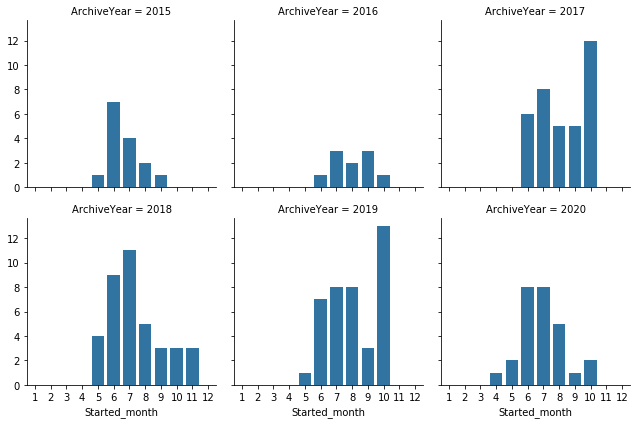

In [34]:
# Plotting the number of fires per month, for each year of our data
g1 = sns.FacetGrid(fires_df, col='ArchiveYear', col_wrap=3)
g1.map(sns.countplot, 'Started_month', order=list(range(1,13)))

From these plots, we can see that the fire season seems to have grown longer on average over the years: In 2016 and 2017, all fires started in the months from May through September, while in 2018-2020, the season was at least one month longer, with fires extending into October/November, and starting in April in 2020.

We will also investigate the number of acres burned on a month-by-month basis:

Total acres burned by month in 2015 :


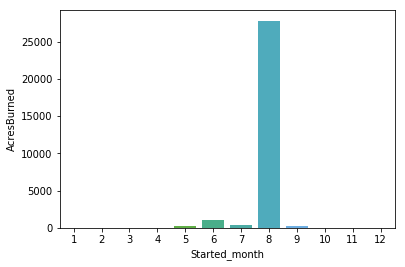

Total acres burned by month in 2016 :


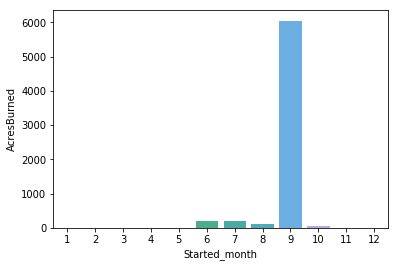

Total acres burned by month in 2017 :


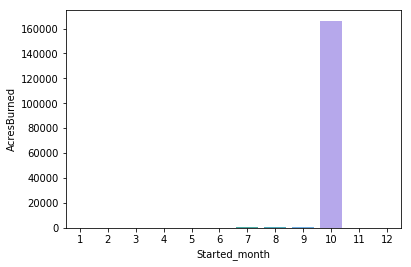

Total acres burned by month in 2018 :


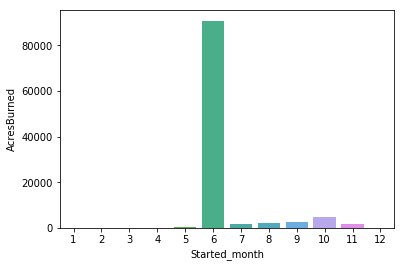

Total acres burned by month in 2019 :


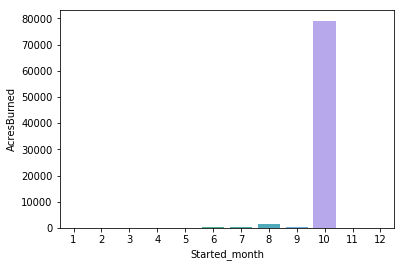

Total acres burned by month in 2020 :


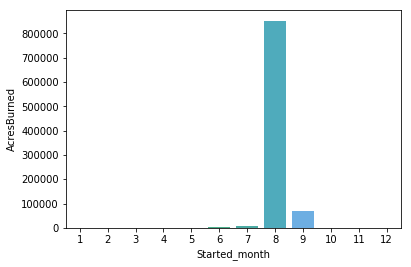

In [68]:
for year in fires_df['ArchiveYear'].unique():
    sns.barplot(data=fires_df[fires_df['ArchiveYear']==year], x='Started_month', y='AcresBurned', 
                order=list(range(1,13)), ci=None, estimator=sum)
    print('Total acres burned by month in', year, ':')
    plt.show()

From these plots, we see that, in each year, there was one month where acres burned far outstripped the other months - perhaps a result of a single major fire incident. However, there is no trend visible in regards to which month this major incident tends to occur in. Regardless, we will keep these monthly breakdowns in mind as a measure of severity of the fires each year.

Next, we will investigate the fires on a county-by-county level to look for any notable features or trends.

In [47]:
# Function to graph the number of wildfires active in each county for each year of our data
def graph_by_county(county):
    county_df = fires_df.copy()
    
    def check_county(list_of_counties):
        if county in list_of_counties:
            return True
        else:
            return False
        
    county_df['In_county'] = county_df['Counties'].apply(check_county)
    
    print('Number of fires in', county, 'County over time:')
    county_df[county_df['In_county']==True].groupby('ArchiveYear')['UniqueId'].count().plot.bar()
    plt.show()

Number of fires in Alameda County over time:


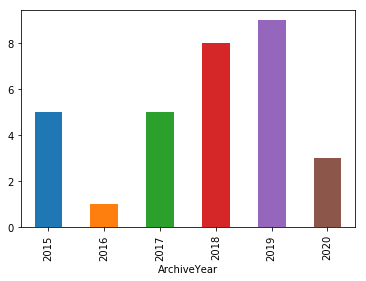

Number of fires in Contra Costa County over time:


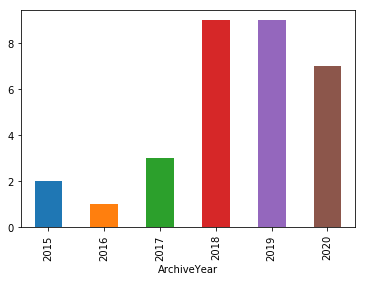

Number of fires in Marin County over time:


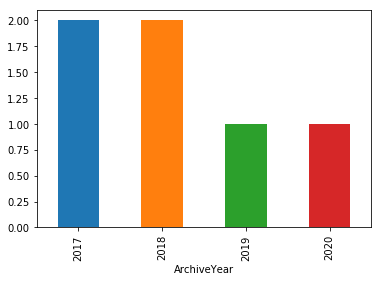

Number of fires in Napa County over time:


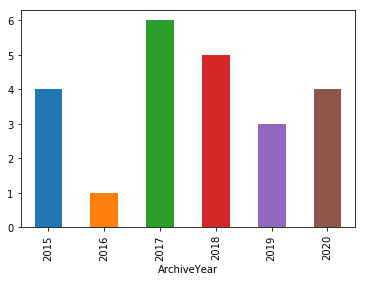

Number of fires in San Mateo County over time:


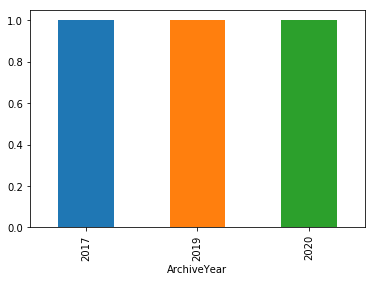

Number of fires in Santa Clara County over time:


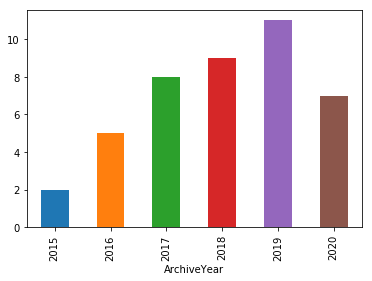

Number of fires in Solano County over time:


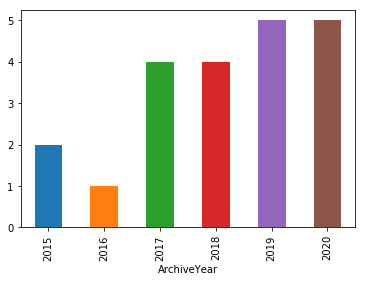

Number of fires in Sonoma County over time:


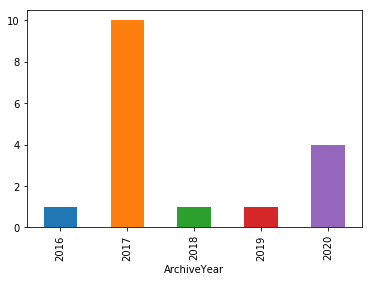

In [48]:
bay_area_counties = ['Alameda', 'Contra Costa', 'Marin', 'Napa', 'San Mateo',
                     'Santa Clara', 'Solano', 'Sonoma']

for i in bay_area_counties:
    graph_by_county(i)

We see that there were very few fires in Marin and San Mateo. In Alameda, Contra Costa, Santa Clara, and Solano, the peak number of fires was recorded around 2019, with a slight dip in 2020 in most counties. In Napa and Sonoma (which neighbor each other), on the other hand, we see that 2017 was a particularly bad year.  

Because there are relatively few fires per year per county, it is difficult to draw any firm conclusions from these data. However, we will keep these observations in mind as we combine the fires data with our other datasets.

Unfortunately, because metrics like acres burned and fatalities are not broken down by county in this dataset, it is difficult to measure the severity of multi-county fire incidents within each individual county.

The main next step for this dataset is to research possible sources to fill in the incorrect Extinguished dates for 2017 and 2018. After that is accomplished, these data will be ready to link to our other datasets, and we may begin conducting more in-depth EDA and preliminary correlation analyses.